# SCROLL DOWN TO "LOGISTIC REGRESSION" TO SEE WHERE TOPIC 2 ASSIGNMENT BEGINS

# Topic 6 Assignemnt
For this assignment, there is only one question. You are responsible for completing all of the steps that you believe are required to fully answer that question based on the notes for Topic 6. You must provide insights throughout the analysis as well as a conclusion.

***For this solution guide I have not provided the exploratory data analysis portion. We have already completed this in our prior lectures. I am only providing the machine learning/model creation solutions here.***

***Assignments should be uploaded in two formats to D2L. The first format is the .ipynb file that contains your code. The second format is an html file that you can obtain by File > Download As > HTML (.html).***

## Question 1

**Data Description:**
All data needed to complete this assignment can be found in the file car_insurance.csv.

**Context:**
You have just been employed at a bank that provides car insurance. The bank has potential customers' data and it is our job to contant these individuals to advertise our available car insurnace options. We are given the results from the last car insurance advertising campaign and it is our job to create a model from this data that can be used for the new campaign. Which customers are likely to purchase the car insurance?

**Attribute Information:** <br>
Id: Customer ID <br>
Age: Age of the client <br>
Job: Job of the client <br>
Marital: Marital status of the client <br>
Education: Education level of the client <br>
Default: Has credit in default? <br>
Balance: Average yearly balance, in USD <br>
HHInsurance: Is household insured <br>
CarLoan: Does the client have a car loan <br>
Communication: Contact/communication type <br>
LastContactMonth: Month of last contact <br>
LastContactDay: Start time of the last call (HH:MM:SS) <br>
CallEnd: End time of the last call (HH:MM:SS) <br>
NoOfContacts: Number of contacts performed during this campaign for this client <br>
DaysPassed: Number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not contacted) <br>
PrevAttempts: Number of contacts performed before this campaign and for this client <br>
Outcome: Outcome of the previous marketing campaign <br>
CarInsurance: Has the client purchased car insurance from the bank ***Target Variable*** <br>

**Objective:**
- You should begin by exploring the data.
- You must clean the data and remove those observations you do not want.
- Examine any possible relationships within the data.
- Prepare the data for modeling.
- Create a logistic regression model to predict which customers will obtain car insurance.
- Provide business insights based on your results.

#### Hint 1: Explore the data

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
from scipy import stats

# calculate confusion matrix
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [2]:
#import the data - we see every other row so far is NaN

df = pd.read_csv('car_insurance.csv')
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,32.0,management,single,tertiary,0.0,1218.0,1.0,0.0,telephone,2.0,-1.0,0.0,NaN,13:45:20,13:46:30,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,32.0,blue-collar,married,primary,0.0,1156.0,1.0,0.0,NaN,5.0,-1.0,0.0,NaN,14:49:03,14:52:08,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

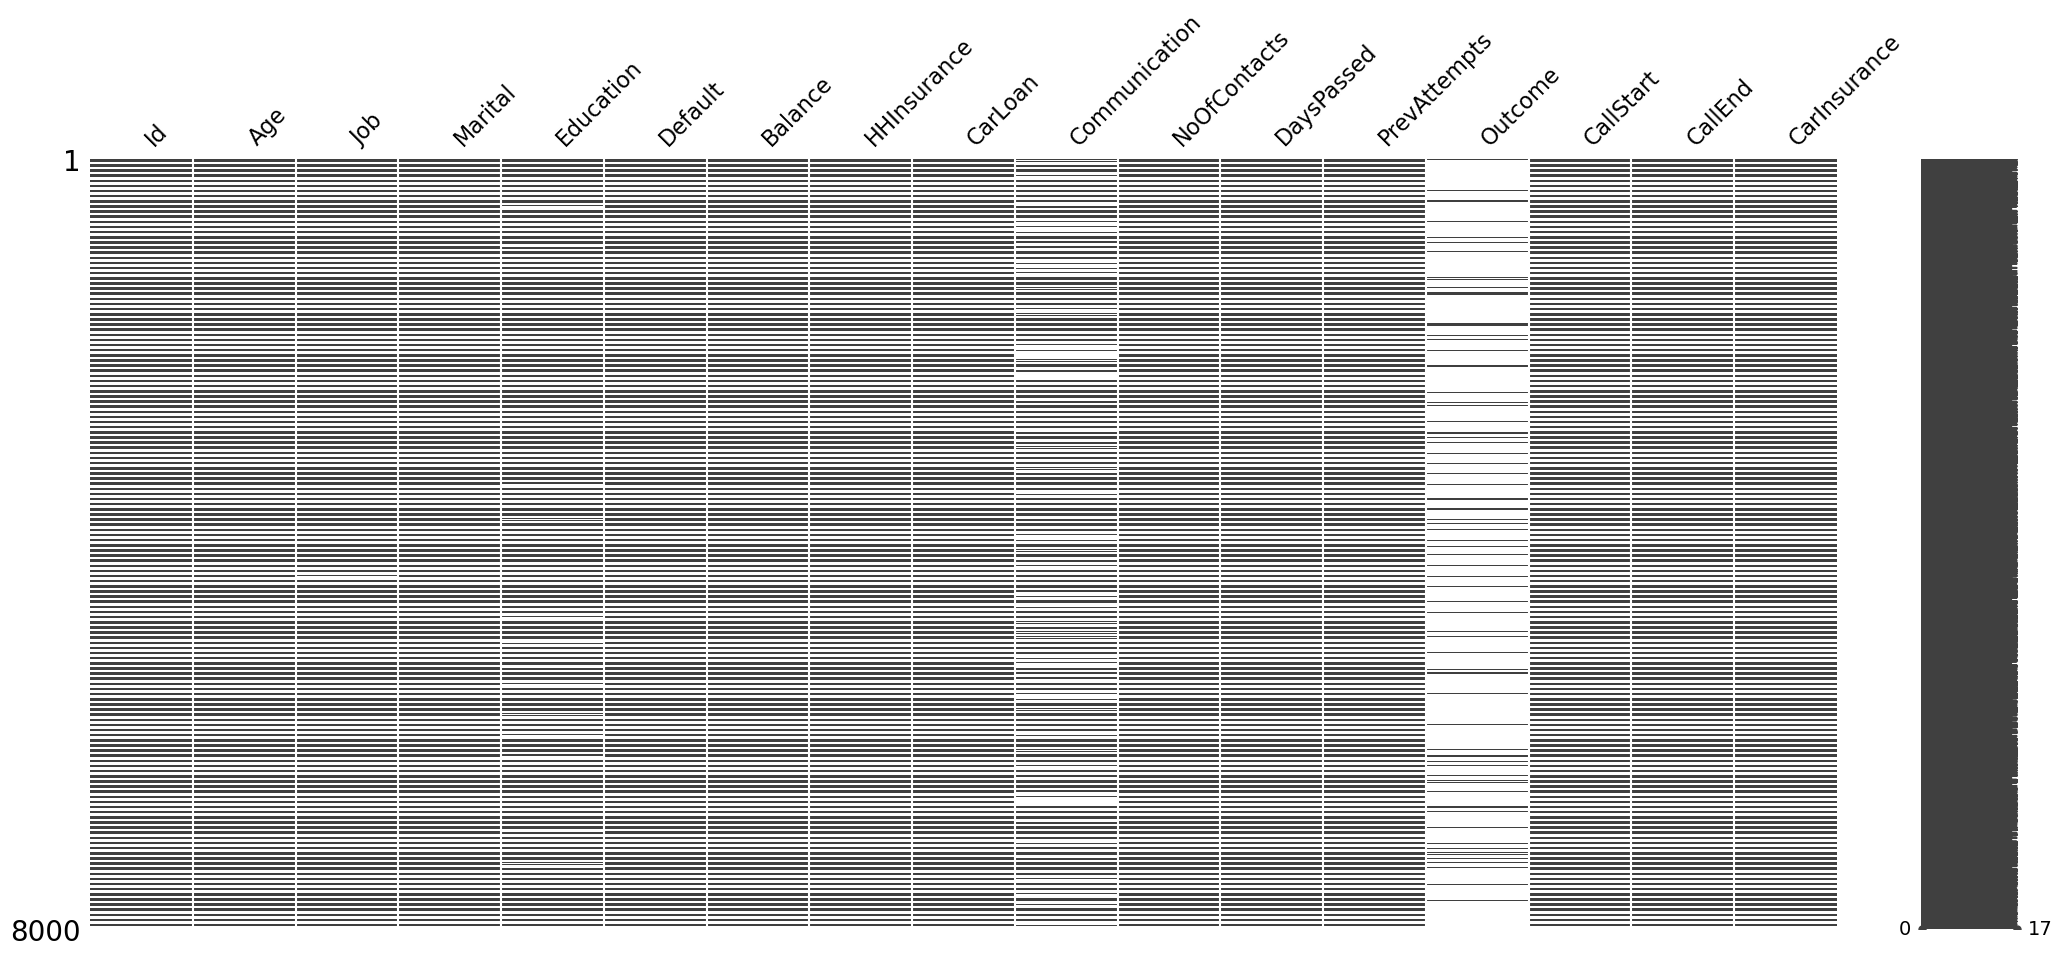

In [3]:
# Visualize missing data -- evidently the csv file is formatted with empty rows
import missingno as msno
msno.matrix(df)

In [4]:
# get data information -- this verifies there are 4000 values but 8000 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             4000 non-null   float64
 1   Age            4000 non-null   float64
 2   Job            3981 non-null   object 
 3   Marital        4000 non-null   object 
 4   Education      3831 non-null   object 
 5   Default        4000 non-null   float64
 6   Balance        4000 non-null   float64
 7   HHInsurance    4000 non-null   float64
 8   CarLoan        4000 non-null   float64
 9   Communication  3098 non-null   object 
 10  NoOfContacts   4000 non-null   float64
 11  DaysPassed     4000 non-null   float64
 12  PrevAttempts   4000 non-null   float64
 13  Outcome        958 non-null    object 
 14  CallStart      4000 non-null   object 
 15  CallEnd        4000 non-null   object 
 16  CarInsurance   4000 non-null   float64
dtypes: float64(10), object(7)
memory usage: 1.0+ MB


From the above cell, we can see the values that are missing:

Job (19)
Education (169)
Communication (902)
Outcome (3042)

In [5]:
# describe the data -- we have some variables that go between 0 and 1
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,4000.0,2000.50000,1154.844867,1.0,1000.75,2000.5,3000.25,4000.0
Age,4000.0,41.21475,11.550194,18.0,32.00,39.0,49.00,95.0
Default,4000.0,0.01450,0.119555,0.0,0.00,0.0,0.00,1.0
Balance,4000.0,1532.93725,3511.452489,-3058.0,111.00,551.5,1619.00,98417.0
HHInsurance,4000.0,0.49275,0.500010,0.0,0.00,0.0,1.00,1.0
CarLoan,4000.0,0.13300,0.339617,0.0,0.00,0.0,0.00,1.0
NoOfContacts,4000.0,2.60725,3.064204,1.0,1.00,2.0,3.00,43.0
DaysPassed,4000.0,48.70650,106.685385,-1.0,-1.00,-1.0,-1.00,854.0
PrevAttempts,4000.0,0.71750,2.078647,0.0,0.00,0.0,0.00,58.0
CarInsurance,4000.0,0.40100,0.490162,0.0,0.00,0.0,1.00,1.0


In [6]:
# Find what is unique within the data -- those 0/1 variables mentioned previously are categorical
df.nunique()

Id               4000
Age                70
Job                11
Marital             3
Education           3
Default             2
Balance          2178
HHInsurance         2
CarLoan             2
Communication       2
NoOfContacts       35
DaysPassed        330
PrevAttempts       20
Outcome             3
CallStart        3777
CallEnd          3764
CarInsurance        2
dtype: int64

Insights

Age, Job, Marital, Education, Default, HHInsurance, CarLoan, Communication, Outcome, CarInsurance are all categorical variables.

Among these, Default, HHInsurance, CarLoan, CarInsurance are already numerical -- 1 or 0.

#### Hint 2: Clean the data and drop unnecessary variables

In [7]:
# ID is a unique variable for each entry and has zero repeating values. We can drop this variable. The time a call started or ended is unecessary.
df = df.drop(columns = 'Id')
df = df.drop(columns = 'CallStart')
df = df.drop(columns = 'CallEnd')

# We can drop NaN rows, how='all' specifies that all values must be NaN to avoid dropping rows with data
df.dropna(how='all', inplace=True)

df.sample(5)

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance
6755,42.0,blue-collar,single,primary,0.0,22.0,1.0,0.0,cellular,4.0,365.0,1.0,failure,0.0
1655,41.0,technician,married,secondary,0.0,1385.0,0.0,0.0,NaN,1.0,-1.0,0.0,NaN,0.0
2913,31.0,management,single,tertiary,0.0,0.0,0.0,0.0,cellular,4.0,-1.0,0.0,NaN,0.0
7053,29.0,technician,single,secondary,0.0,113.0,0.0,0.0,cellular,2.0,183.0,4.0,success,1.0
1223,22.0,student,single,secondary,0.0,216.0,0.0,0.0,cellular,1.0,187.0,1.0,success,1.0


#### Hint 3: Explore the data

In [8]:
df

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CarInsurance
1,32.0,management,single,tertiary,0.0,1218.0,1.0,0.0,telephone,2.0,-1.0,0.0,NaN,0.0
3,32.0,blue-collar,married,primary,0.0,1156.0,1.0,0.0,NaN,5.0,-1.0,0.0,NaN,0.0
5,29.0,management,single,tertiary,0.0,637.0,1.0,0.0,cellular,1.0,119.0,1.0,failure,1.0
7,25.0,student,single,primary,0.0,373.0,1.0,0.0,cellular,2.0,-1.0,0.0,NaN,1.0
9,30.0,management,married,tertiary,0.0,2694.0,0.0,0.0,cellular,1.0,-1.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7991,28.0,technician,single,tertiary,0.0,0.0,1.0,0.0,cellular,1.0,40.0,2.0,failure,1.0
7993,49.0,admin.,divorced,secondary,0.0,124.0,1.0,1.0,cellular,19.0,-1.0,0.0,NaN,0.0
7995,27.0,admin.,single,secondary,0.0,-400.0,0.0,1.0,cellular,1.0,-1.0,0.0,NaN,0.0
7997,36.0,entrepreneur,single,tertiary,0.0,658.0,1.0,0.0,cellular,1.0,227.0,3.0,failure,0.0


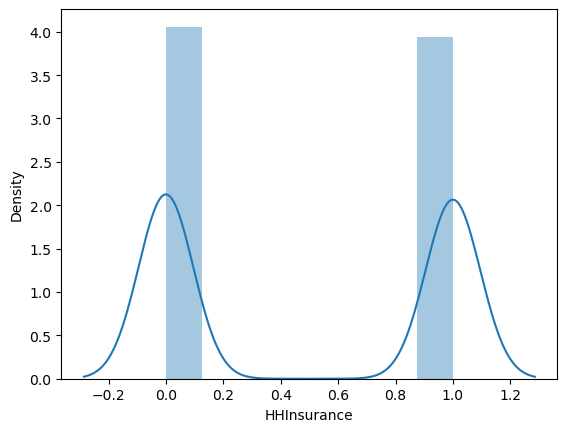

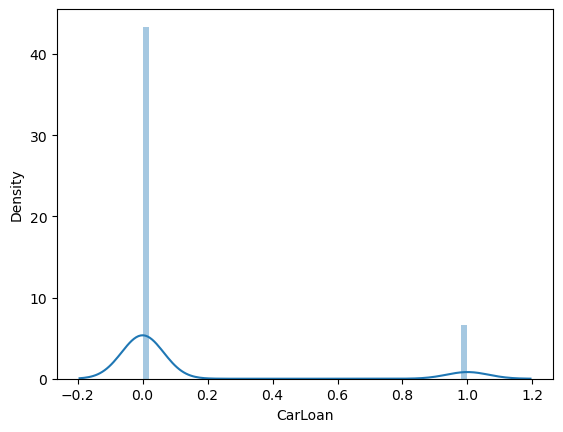

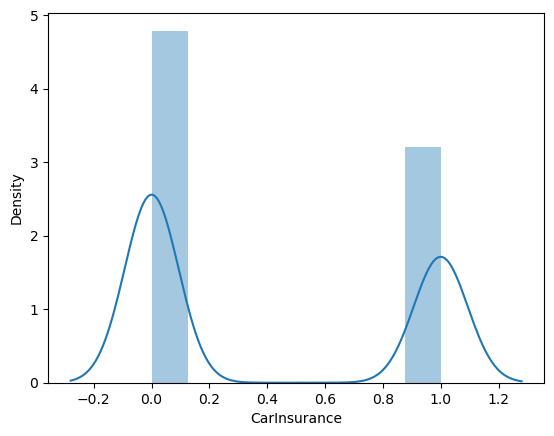

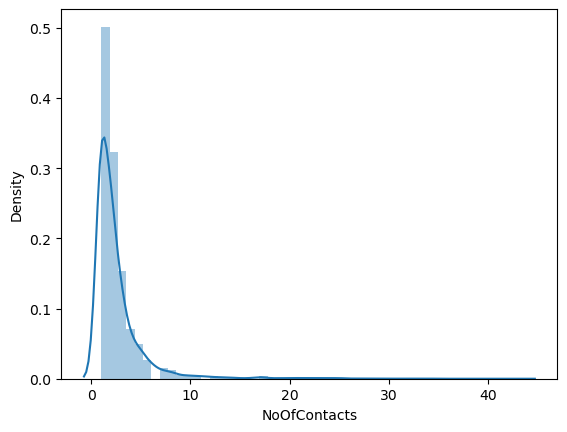

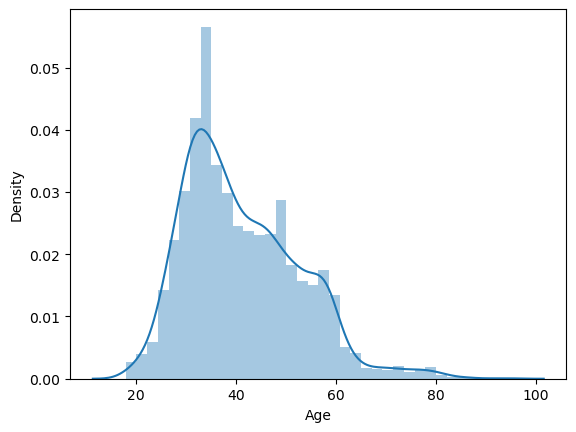

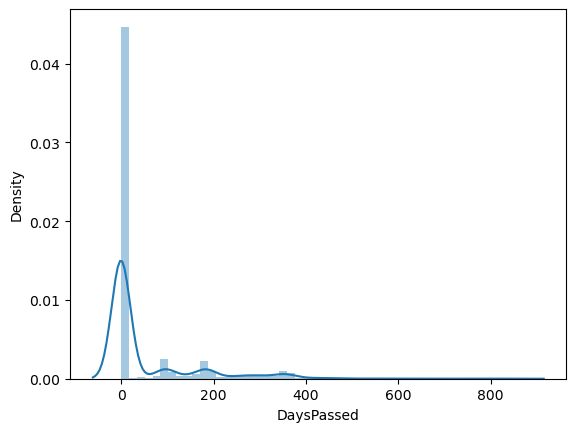

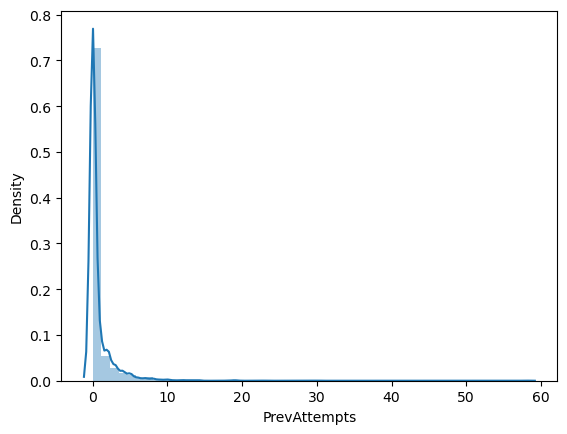

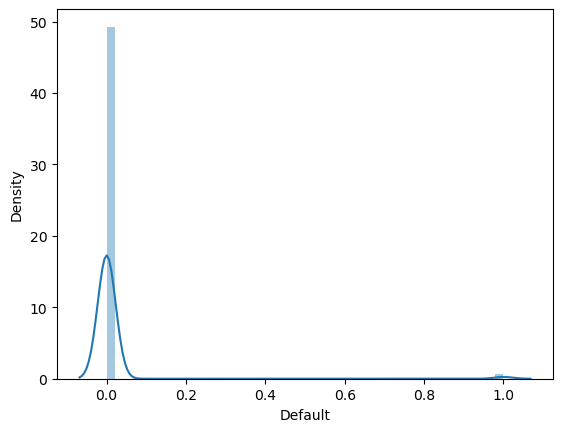

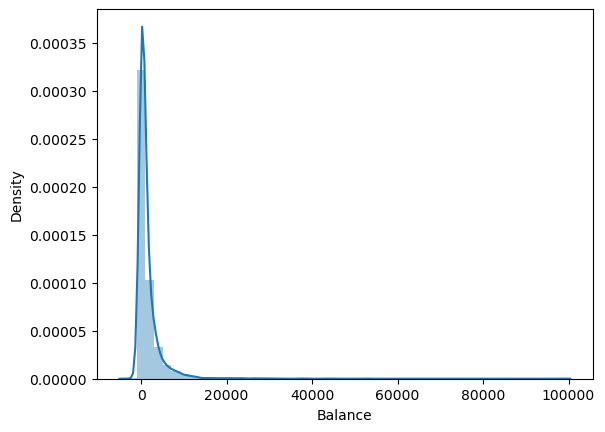

In [9]:
# distplot for continous columns
# these allow us to verify that some of the numerical variables we noted are indeed categorical
for i in ['HHInsurance','CarLoan','CarInsurance','NoOfContacts','Age','DaysPassed','PrevAttempts','Default', 'Balance']:
    sns.distplot(df[i])
    plt.show()

Insight

HHInsurance, CarLoan, CarInsurance, and Default are indeed categorical variables -- 1 or 0. The proportions of customers in default or with a car loan are very highly false; we'll have to see their impact on our target value to determine what to do with them.

In [10]:
#This one is needed
df['CarLoan'].value_counts()

CarLoan
0.0    3468
1.0     532
Name: count, dtype: int64

In [11]:
df['CarLoan'].value_counts(normalize=True)

CarLoan
0.0    0.867
1.0    0.133
Name: proportion, dtype: float64

In [12]:
#This could probably be dropped since it is 50% either way
df['HHInsurance'].value_counts()

HHInsurance
0.0    2029
1.0    1971
Name: count, dtype: int64

In [13]:
#This could probably be dropped since it is 50% either way
df['HHInsurance'].value_counts(normalize=True)

HHInsurance
0.0    0.50725
1.0    0.49275
Name: proportion, dtype: float64

In [14]:
#Shows 60% of the people bought insurance from the bank last time, probably need this one
df['CarInsurance'].value_counts()

CarInsurance
0.0    2396
1.0    1604
Name: count, dtype: int64

In [15]:
df['CarInsurance'].value_counts(normalize=True)

CarInsurance
0.0    0.599
1.0    0.401
Name: proportion, dtype: float64

In [16]:
#Shows 60% of the people bought insurance from the bank last time
df['CarLoan'].value_counts()

CarLoan
0.0    3468
1.0     532
Name: count, dtype: int64

In [17]:
df['CarLoan'].value_counts(normalize=True)

CarLoan
0.0    0.867
1.0    0.133
Name: proportion, dtype: float64

In [18]:
#Everything after 3 attempts seems useless. Not sure that we need to keep this one. See % below
df['NoOfContacts'].value_counts()

NoOfContacts
1.0     1685
2.0     1085
3.0      516
4.0      237
5.0      166
6.0       88
7.0       49
8.0       41
9.0       20
10.0      18
11.0      15
17.0      11
12.0      11
13.0       8
14.0       7
25.0       4
20.0       4
21.0       4
22.0       3
23.0       3
15.0       3
19.0       3
16.0       3
24.0       3
18.0       3
43.0       1
41.0       1
30.0       1
38.0       1
28.0       1
29.0       1
32.0       1
26.0       1
34.0       1
27.0       1
Name: count, dtype: int64

In [19]:
#We can probably drop this variable since only the first 3 contacts have any frequency to them and 1 is 42% of the entire list.
df['NoOfContacts'].value_counts(normalize=True)

NoOfContacts
1.0     0.42125
2.0     0.27125
3.0     0.12900
4.0     0.05925
5.0     0.04150
6.0     0.02200
7.0     0.01225
8.0     0.01025
9.0     0.00500
10.0    0.00450
11.0    0.00375
17.0    0.00275
12.0    0.00275
13.0    0.00200
14.0    0.00175
25.0    0.00100
20.0    0.00100
21.0    0.00100
22.0    0.00075
23.0    0.00075
15.0    0.00075
19.0    0.00075
16.0    0.00075
24.0    0.00075
18.0    0.00075
43.0    0.00025
41.0    0.00025
30.0    0.00025
38.0    0.00025
28.0    0.00025
29.0    0.00025
32.0    0.00025
26.0    0.00025
34.0    0.00025
27.0    0.00025
Name: proportion, dtype: float64

In [20]:
#This might be of value if the majority are in a certain age bracket, ie 30-40
df['Age'].value_counts()

Age
31.0    182
32.0    177
33.0    164
34.0    163
35.0    157
       ... 
86.0      2
87.0      1
84.0      1
92.0      1
95.0      1
Name: count, Length: 70, dtype: int64

In [21]:
df['Age'].value_counts(normalize=True)

Age
31.0    0.04550
32.0    0.04425
33.0    0.04100
34.0    0.04075
35.0    0.03925
         ...   
86.0    0.00050
87.0    0.00025
84.0    0.00025
92.0    0.00025
95.0    0.00025
Name: proportion, Length: 70, dtype: float64

In [22]:
#This is diffently relavent
df['Default'].value_counts()

Default
0.0    3942
1.0      58
Name: count, dtype: int64

In [23]:
#This is diffently relavent
df['Default'].value_counts(normalize=True)

Default
0.0    0.9855
1.0    0.0145
Name: proportion, dtype: float64

In [24]:
#-1 is the only thing here that is significant
df['DaysPassed'].value_counts()

DaysPassed
-1.0      3042
 92.0       38
 182.0      33
 183.0      24
 91.0       24
          ... 
 212.0       1
 226.0       1
 76.0        1
 388.0       1
 40.0        1
Name: count, Length: 330, dtype: int64

In [25]:
#-1 is the only thing here that is significant
df['DaysPassed'].value_counts(normalize=True)

DaysPassed
-1.0      0.76050
 92.0     0.00950
 182.0    0.00825
 183.0    0.00600
 91.0     0.00600
           ...   
 212.0    0.00025
 226.0    0.00025
 76.0     0.00025
 388.0    0.00025
 40.0     0.00025
Name: proportion, Length: 330, dtype: float64

In [26]:
#Could probably drop this one. Only number with any significants is 0.0
df['PrevAttempts'].value_counts()

PrevAttempts
0.0     3042
1.0      335
2.0      251
3.0      125
4.0       79
5.0       60
6.0       25
7.0       21
8.0       18
10.0      10
9.0        9
12.0       5
14.0       5
13.0       4
19.0       4
11.0       3
30.0       1
23.0       1
18.0       1
58.0       1
Name: count, dtype: int64

In [27]:
#Could probably drop this one. Only number with any significants is 0.0
df['PrevAttempts'].value_counts(normalize=True)

PrevAttempts
0.0     0.76050
1.0     0.08375
2.0     0.06275
3.0     0.03125
4.0     0.01975
5.0     0.01500
6.0     0.00625
7.0     0.00525
8.0     0.00450
10.0    0.00250
9.0     0.00225
12.0    0.00125
14.0    0.00125
13.0    0.00100
19.0    0.00100
11.0    0.00075
30.0    0.00025
23.0    0.00025
18.0    0.00025
58.0    0.00025
Name: proportion, dtype: float64

In [28]:
#This one doesn't look significant either
df['Balance'].value_counts()

Balance
 0.0       309
 1.0        14
 2.0        13
 3.0        13
 5.0        11
          ... 
 2387.0      1
 2763.0      1
-59.0        1
 827.0       1
-400.0       1
Name: count, Length: 2178, dtype: int64

In [29]:
#This one doesn't look significant either
df['Balance'].value_counts(normalize=True)

Balance
 0.0       0.07725
 1.0       0.00350
 2.0       0.00325
 3.0       0.00325
 5.0       0.00275
            ...   
 2387.0    0.00025
 2763.0    0.00025
-59.0      0.00025
 827.0     0.00025
-400.0     0.00025
Name: proportion, Length: 2178, dtype: float64

In [30]:
# NoOfContacts, PrevAttempts, Communication all seem to be irrelevant for our analysis
df = df.drop(columns = 'NoOfContacts')
df = df.drop(columns = 'PrevAttempts')

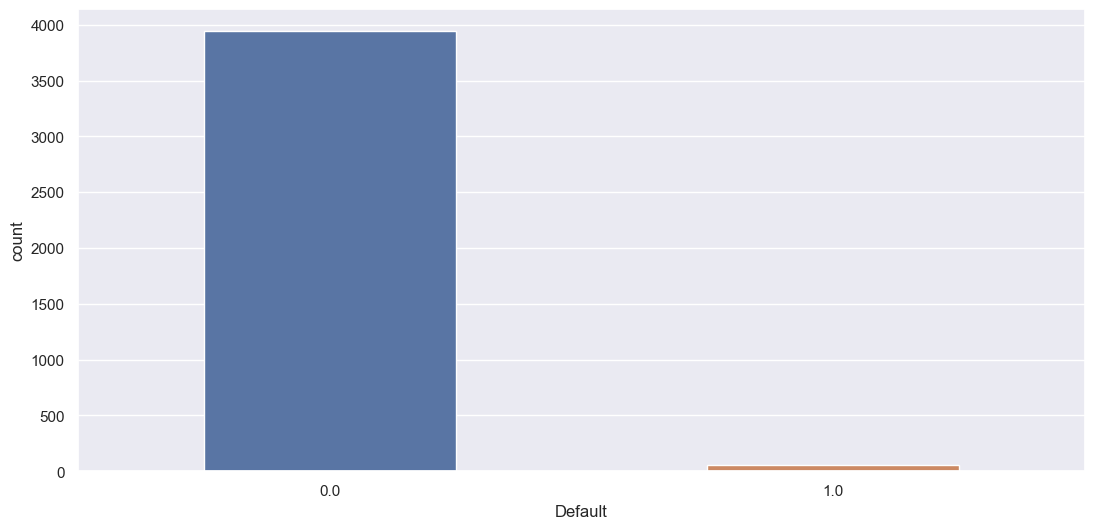

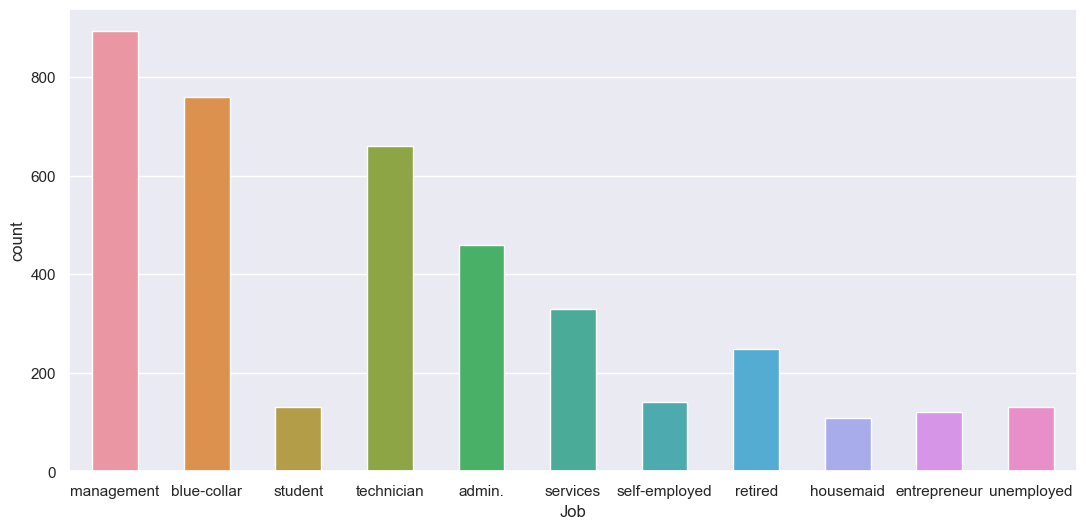

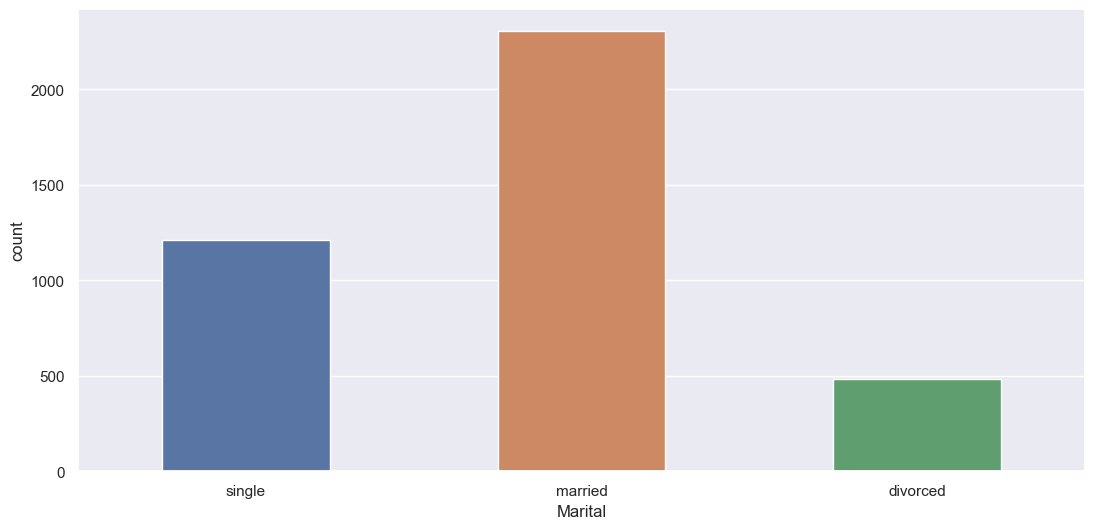

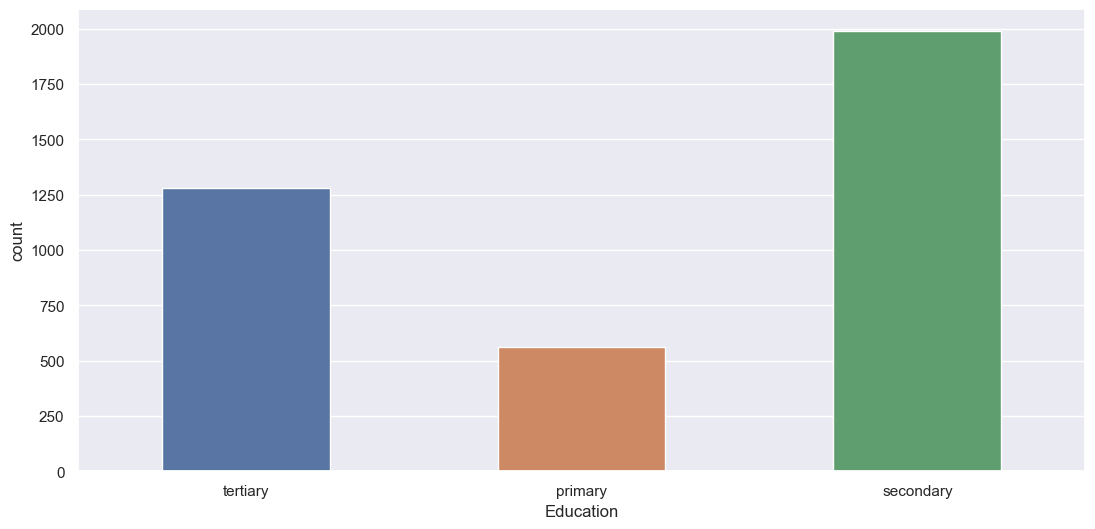

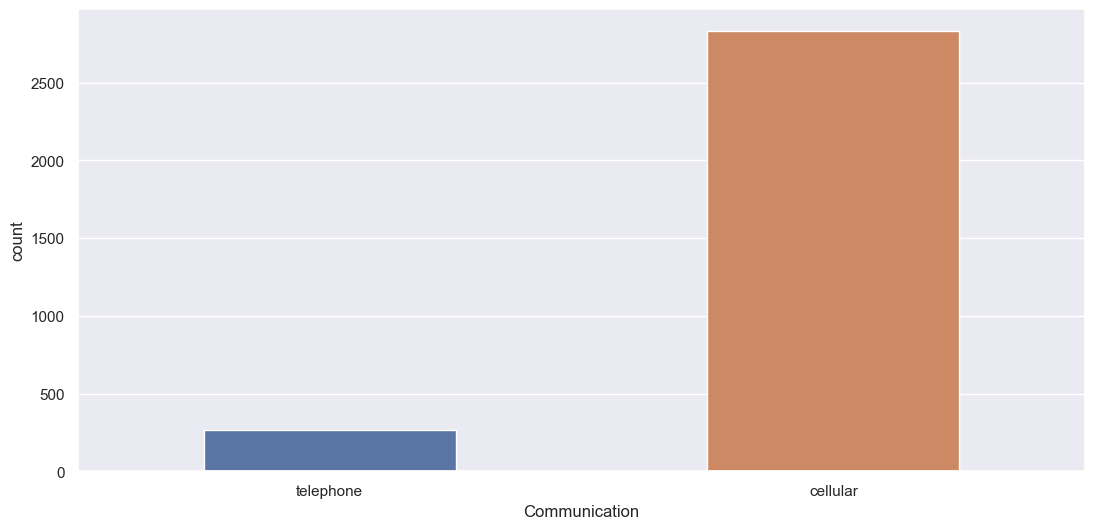

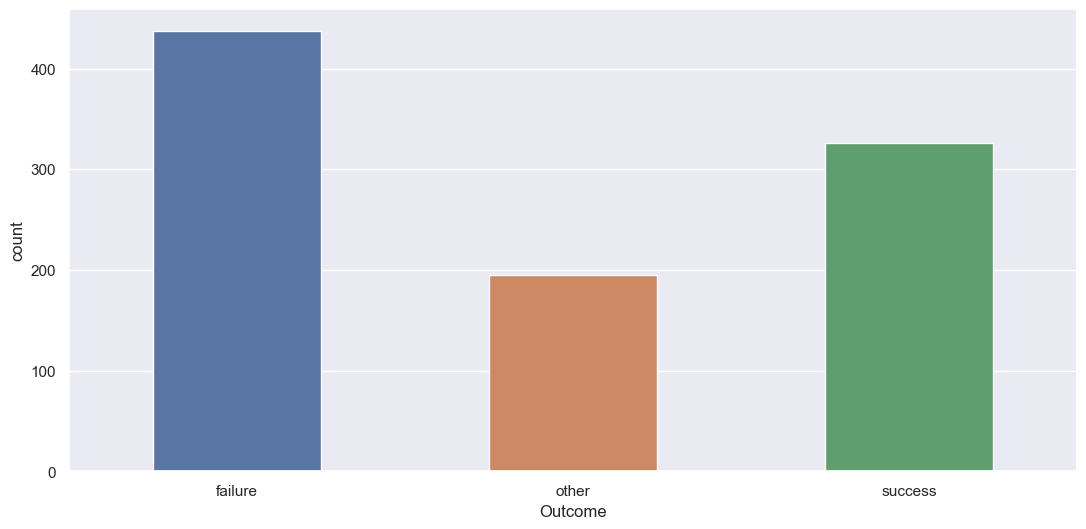

In [31]:
# We can visualize the distribution of categorical variables here
# This may help us fill in missing values or group values together
sns.set(rc={"figure.figsize":(13, 6)})
for i in ['Default', 'Job','Marital','Education', 'Communication', 'Outcome']:
    sns.countplot(x = df[i], width=.5)
    plt.show()

In [32]:
# We seem to have lots of missing data
# Since an overwhelming number of people didn't participate in the last campaign, we drop 'Outcome'
df.isnull().sum()

Age                 0
Job                19
Marital             0
Education         169
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication     902
DaysPassed          0
Outcome          3042
CarInsurance        0
dtype: int64

In [33]:
# Designating numerical categorical variables
df['CarLoan'] = df['CarLoan'].astype('category')
df['HHInsurance'] = df['HHInsurance'].astype('category')
df['Default'] = df['Default'].astype('category')
df['CarInsurance'] = df['CarInsurance'].astype('category')

# ~2750 cellular entries vs ~250 telephone entries, we assume the missing values are cellular
df['Communication'].fillna('cellular', inplace=True)
df['Job'].fillna('unemployed', inplace=True)
df['Education'].fillna('secondary', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 1 to 7999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Age            4000 non-null   float64 
 1   Job            4000 non-null   object  
 2   Marital        4000 non-null   object  
 3   Education      4000 non-null   object  
 4   Default        4000 non-null   category
 5   Balance        4000 non-null   float64 
 6   HHInsurance    4000 non-null   category
 7   CarLoan        4000 non-null   category
 8   Communication  4000 non-null   object  
 9   DaysPassed     4000 non-null   float64 
 10  Outcome        958 non-null    object  
 11  CarInsurance   4000 non-null   category
dtypes: category(4), float64(3), object(5)
memory usage: 297.4+ KB


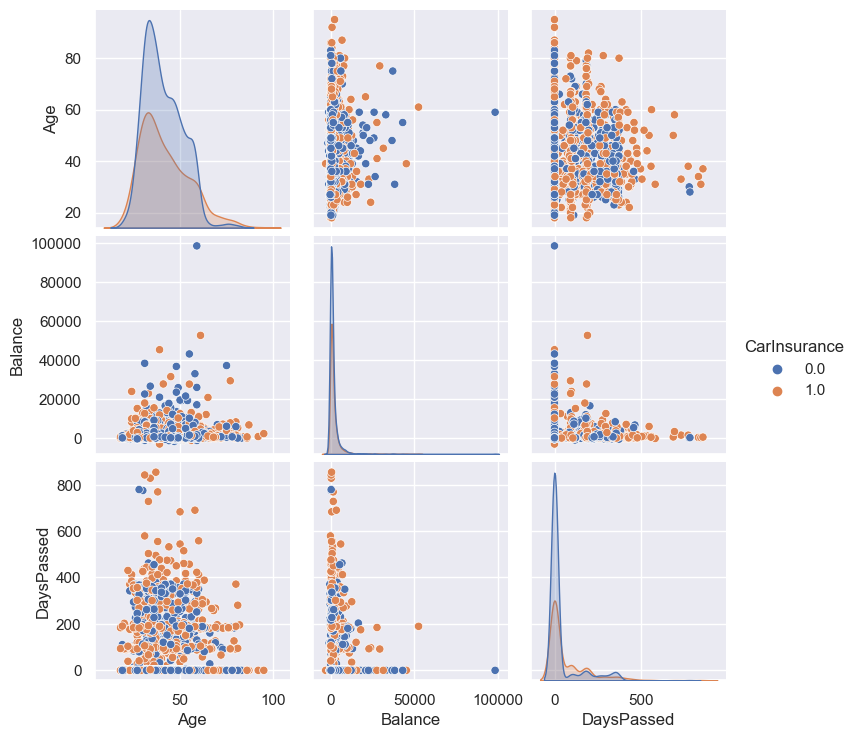

In [34]:
sns.pairplot(df, hue = 'CarInsurance')

In [35]:
# Explore our categorical variables to make sure we aren't missing any important relationships
explore_vars = ['Default', 'Communication', 'Outcome', 'CarLoan', 'HHInsurance']

for i in explore_vars:
    display(pd.crosstab(df[i], df['CarInsurance'], normalize = 'index'))

CarInsurance,0.0,1.0
Default,,
0.0,0.596651,0.403349
1.0,0.758621,0.241379


CarInsurance,0.0,1.0
Communication,,
cellular,0.603268,0.396732
telephone,0.539326,0.460674


CarInsurance,0.0,1.0
Outcome,,
failure,0.597254,0.402746
other,0.528205,0.471795
success,0.107362,0.892638


CarInsurance,0.0,1.0
CarLoan,,
0.0,0.581315,0.418685
1.0,0.714286,0.285714


CarInsurance,0.0,1.0
HHInsurance,,
0.0,0.500739,0.499261
1.0,0.700152,0.299848


#### Hint 4: Prepare data for modeling by creating training and testing data, filling in missing values, and creating dummy variables

In [36]:
# Assign dummy variables to Age, Job, Marital, Education, Balance as categorical variables
# We are able to assign dummies/fill in null values at this step before we create test and training sets because we assume that
# if these variables are left blank it means that respondants were unemployed or had no college ed for null values found above

df['Age'] = pd.cut(df['Age'], bins=[0, 35, 55, float('Inf')], labels=['Low', 'Med', 'High'])

df['Job_Employed'] = np.where(df['Job'] == ('unemployed' or 'student'), 0, 1)
df['Marital_Married'] = np.where(df['Marital'] == 'married', 1, 0)
df['Education_College'] = np.where(df['Education'] == 'tertiary', 1, 0)
df['Balance_True'] = np.where(df['Balance'] == 0, 0, 1)

# Remove unnecessary columns
df = df.drop(columns=['Job', 'Marital', 'Education', 'Balance', 'Communication'])

df.sample(10)

,Age,Default,HHInsurance,CarLoan,DaysPassed,Outcome,CarInsurance,Job_Employed,Marital_Married,Education_College,Balance_True
7155,Low,0.0,1.0,0.0,160.0,other,1.0,1,0,0,1
557,Med,0.0,1.0,0.0,-1.0,NaN,0.0,1,0,0,1
1091,Med,0.0,0.0,0.0,-1.0,NaN,1.0,1,1,0,1
457,Low,0.0,1.0,0.0,-1.0,NaN,1.0,1,0,1,1
753,Med,0.0,0.0,0.0,-1.0,NaN,0.0,1,1,0,1
4579,Low,0.0,1.0,0.0,-1.0,NaN,1.0,0,0,0,1
3689,Med,0.0,1.0,0.0,-1.0,NaN,0.0,1,1,0,1
4461,Med,0.0,1.0,0.0,-1.0,NaN,0.0,1,1,0,1
7275,Med,0.0,1.0,1.0,-1.0,NaN,0.0,1,1,1,1
5959,Low,0.0,1.0,0.0,122.0,failure,0.0,1,0,0,1


In [37]:
# Explore our new dummy variables to make sure our cutoffs are statistically relevant
explore_vars = ['Age', 'Job_Employed', 'Education_College', 'Marital_Married', 'Balance_True']

for i in explore_vars:
    display(pd.crosstab(df[i], df['CarInsurance'], normalize = 'index'))

CarInsurance,0.0,1.0
Age,,
Low,0.583169,0.416831
Med,0.641906,0.358094
High,0.485769,0.514231


CarInsurance,0.0,1.0
Job_Employed,,
0,0.442953,0.557047
1,0.605038,0.394962


CarInsurance,0.0,1.0
Education_College,,
0,0.630611,0.369389
1,0.531981,0.468019


CarInsurance,0.0,1.0
Marital_Married,,
0,0.545401,0.454599
1,0.638455,0.361545


CarInsurance,0.0,1.0
Balance_True,,
0,0.666667,0.333333
1,0.593335,0.406665


In [38]:
# Explore number of high age people to compare against other age categories
df['Age'].value_counts()

Age
Med     1952
Low     1521
High     527
Name: count, dtype: int64

The exploratory variables show us the relationship between CarInsurance (our target value) and some of the data we were unsure about:

Outcome: Very likely that a previous marketing success leads to purchased car insurance, but given that we have 3000+ missing values we will drop this column.
HHInsurance: Previously we noticed a 50/50 distribution for this column, but now we see it has significant impact on whether or not the subject has insurance -- a 20% change.
Default: Important variable; 40% of those with default had insurance vs 24% without.
Employment Status: 16% swing based on the groupings we created.
Marital & Education: 9-10% swing based on the groupings we created.
Bank Balance: Having a nonzero bank balance made the customer 7% more likely to have insurance.
Communication: Using cellular vs landline made the customer 7% less likely to have insurance. We can drop this column.

In [39]:
# Decided to keep outcome, as its success had high impact on car insurance purchase. We fill in any
# Outcome values with -1 days passed as 'other' -- they were never contacted
df.loc[df['Outcome'].isna() & (df['DaysPassed'] == -1), 'Outcome'] = 'other'
df

,Age,Default,HHInsurance,CarLoan,DaysPassed,Outcome,CarInsurance,Job_Employed,Marital_Married,Education_College,Balance_True
1,Low,0.0,1.0,0.0,-1.0,other,0.0,1,0,1,1
3,Low,0.0,1.0,0.0,-1.0,other,0.0,1,1,0,1
5,Low,0.0,1.0,0.0,119.0,failure,1.0,1,0,1,1
7,Low,0.0,1.0,0.0,-1.0,other,1.0,1,0,0,1
9,Low,0.0,0.0,0.0,-1.0,other,0.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7991,Low,0.0,1.0,0.0,40.0,failure,1.0,1,0,1,0
7993,Med,0.0,1.0,1.0,-1.0,other,0.0,1,0,0,1
7995,Low,0.0,0.0,1.0,-1.0,other,0.0,1,0,0,1
7997,Med,0.0,1.0,0.0,227.0,failure,0.0,1,0,1,1


# LOGISTIC REGRESSION

In [40]:
# Separate target variable from the rest of the data
X = df.drop(columns='CarInsurance')
y = df['CarInsurance']

In [41]:
# Training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=123)
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (2800, 10)
y_train: (2800,)
X_test: (1200, 10)
y_test: (1200,)


In [42]:
X_train.isnull().sum()

Age                  0
Default              0
HHInsurance          0
CarLoan              0
DaysPassed           0
Outcome              0
Job_Employed         0
Marital_Married      0
Education_College    0
Balance_True         0
dtype: int64

In [43]:
X_train = pd.get_dummies(X_train, columns = ['Age', 'Outcome'], drop_first=True)

In [44]:
X_test.isnull().sum()

Age                  0
Default              0
HHInsurance          0
CarLoan              0
DaysPassed           0
Outcome              0
Job_Employed         0
Marital_Married      0
Education_College    0
Balance_True         0
dtype: int64

In [45]:
X_test = pd.get_dummies(X_test, columns = ['Age', 'Outcome'], drop_first=True)

#### Hint 5: Create our model

In [46]:
logreg = LogisticRegression(random_state=123, fit_intercept=False, max_iter = 1000)
logreg.fit(X_train, y_train)

LogisticRegression(fit_intercept=False, max_iter=1000, random_state=123)

In [47]:
y_predict = logreg.predict(X_test)

In [48]:
z = X_test.copy()
z['Observed Car Insurance'] = y_test
z['Predicted Car Insurance'] = y_predict
z.head()

,Default,HHInsurance,CarLoan,DaysPassed,Job_Employed,Marital_Married,Education_College,Balance_True,Age_Med,Age_High,Outcome_other,Outcome_success,Observed Car Insurance,Predicted Car Insurance
2407,0.0,1.0,0.0,-1.0,1,0,0,1,False,False,True,False,0.0,0.0
5655,0.0,1.0,0.0,503.0,1,0,1,1,False,False,False,False,1.0,1.0
4651,1.0,1.0,0.0,-1.0,0,1,0,1,True,False,True,False,0.0,0.0
7833,0.0,1.0,0.0,260.0,1,1,0,1,True,False,False,False,0.0,0.0
7643,0.0,0.0,0.0,-1.0,1,0,1,1,False,False,True,False,0.0,1.0


Training accuracy: 0.693

Testing accuracy: 0.682

Confusion Matrix


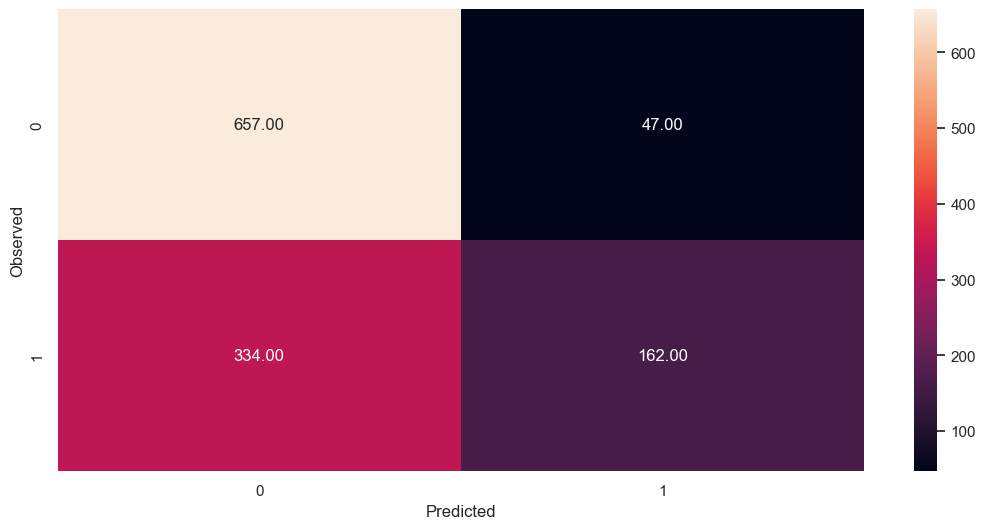

None


In [49]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

print("Training accuracy: {:.3f}".format(logreg.score(X_train,y_train)))
print()
print("Testing accuracy: {:.3f}".format(logreg.score(X_test, y_test)))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))

In [50]:
# Feature Importance or Coefficients
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff', ascending=False)

,Col,Coeff
11,Outcome_success,2.30
1,HHInsurance,0.72
4,Job_Employed,0.55
0,Default,0.42
5,Marital_Married,0.35
2,CarLoan,0.31
7,Balance_True,0.26
6,Education_College,0.25
9,Age_High,0.25
10,Outcome_other,0.19


#### Hint 6: Business Insights

Analysis
We dropped NoOfContacts, PrevAttempts, and Communication as these were deemed unnecessary for our analysis. We kept the variables listed above and changed them to categorical where possible.
Household insured was the second most significant variable based on our analysis. This could be due to people having an umbrella insurance policy, where car insurance is rolled into one product along with home insurance.
Having credit in default was another significant variable, where having credit in default means you are more likely to not have car insurance. Higher risk individuals, such as those that would default on a loan, are more likely to not have car insurance.
Having an account at the bank was also a significant variable, where a balance of zero means a higher likelihood that the person does not have car insurance.
Potential customers who do have a car loan are less likely to have purchased car insurance through the bank. This could be due to negative customer experience. Perhaps customers who financed a car through this bank had an unfavorable experience and chose to purchase car insurance elsewhere.
Based on our analysis, customers who are most likely to purchase insurance through the bank are those who are not household insured, those who do not have credit in default, and those who do not have an account balance of zero.
We played with different variable relationships and tested our model including and excluding a number of different variables. After multiple rounds of testing, the highest accuracy we could achieve was the one above: a training accuracy of 69% and a testing accuracy of 68%. This is relatively inaccurate, especially when predicting who won't buy car insurance. The model had a 78% accuracy when predicting who would buy car insurance, getting 162/206 correct. However, the model only had a 66% accuracy otherwise, getting 660/994 non-purchasers correct. This could be due to the data simply not having very many significant relationships.

# DECISION TREE -- UNTUNED

In [51]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [52]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm=confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Training Accuracy: 0.7632142857142857
Testing Accuracy: 0.65


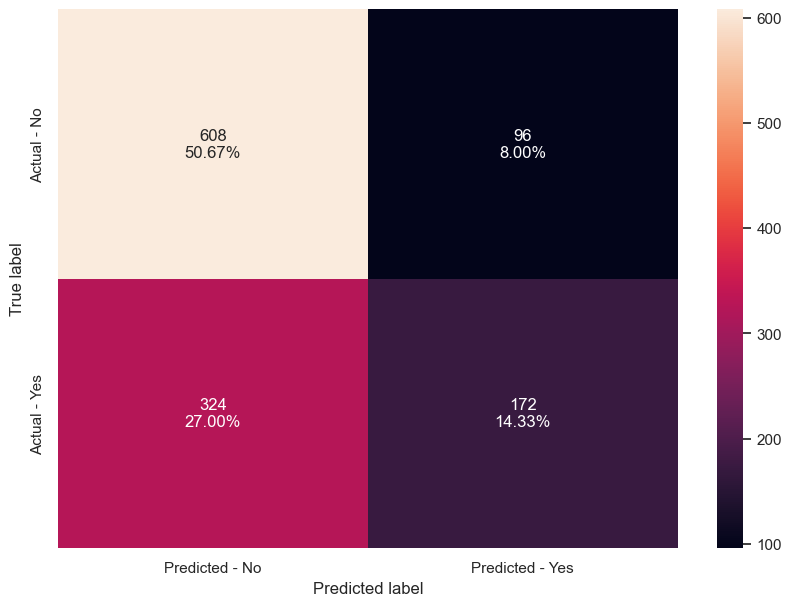

In [53]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train, y_train)

#Calculating model accuracy
print('Training Accuracy:', d_tree.score(X_train, y_train))
print('Testing Accuracy:', d_tree.score(X_test, y_test))

#Creating confusion matrix
make_confusion_matrix(d_tree, y_test)

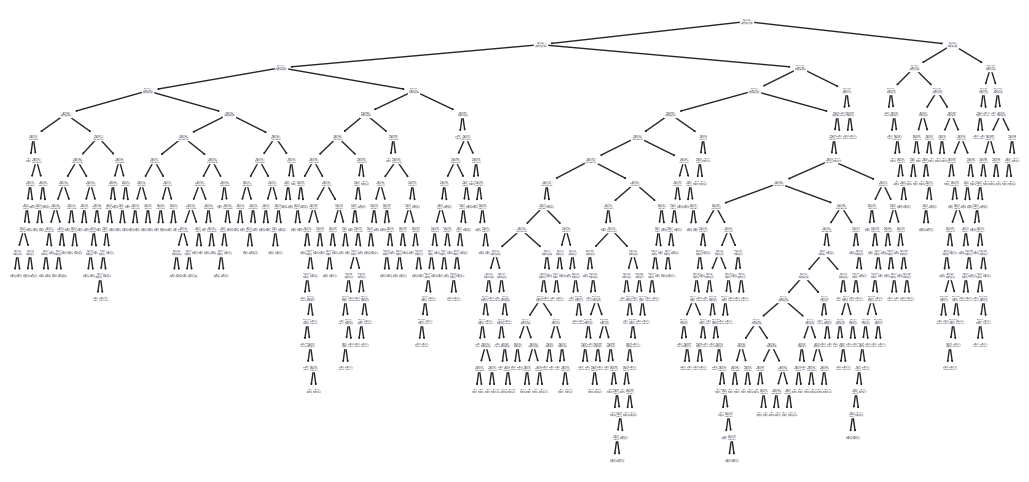

In [54]:
tree.plot_tree(d_tree);

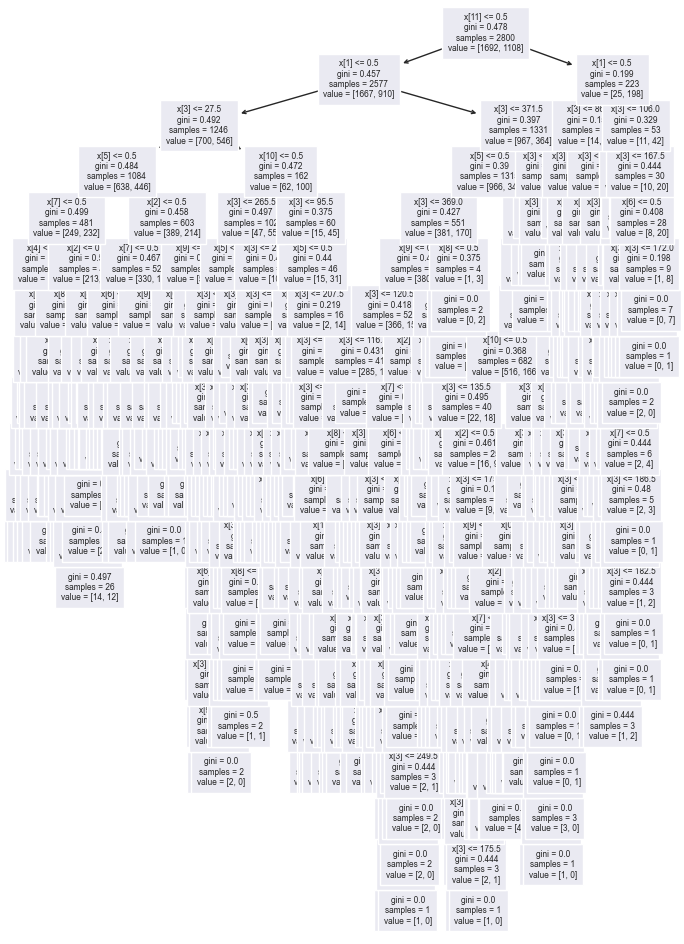

In [63]:
plt.figure(figsize=(8, 12))  # set plot size (denoted in inches)
tree.plot_tree(d_tree, fontsize=6)
plt.show()

# DECISION TREE -- TUNED

In [56]:
#Import 'GridSearchCV' and 'make_scorer'
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [59]:
#Choose the type of classifier.
d_tree_tuned = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,5),
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Run the grid search
grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring='accuracy', n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the decision tree to the best combination of parameters
d_tree_tuned = grid_obj.best_estimator_

Tuned Training Accuracy: 0.6846428571428571
Tuned Testing Accuracy: 0.6733333333333333


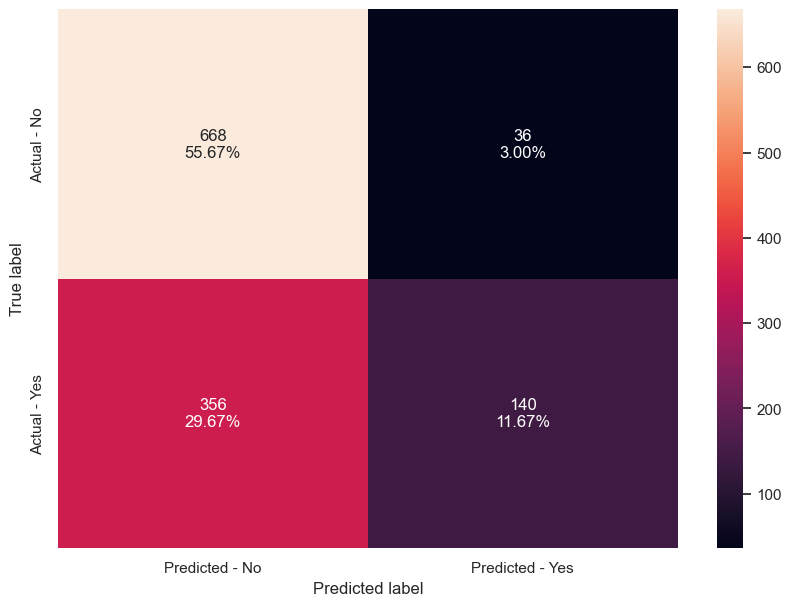

In [73]:
#Calculating model accuracy
print('Tuned Training Accuracy:', d_tree_tuned.score(X_train, y_train))
print('Tuned Testing Accuracy:', d_tree_tuned.score(X_test, y_test))

#Creating confusion matrix
make_confusion_matrix(d_tree_tuned, y_test)

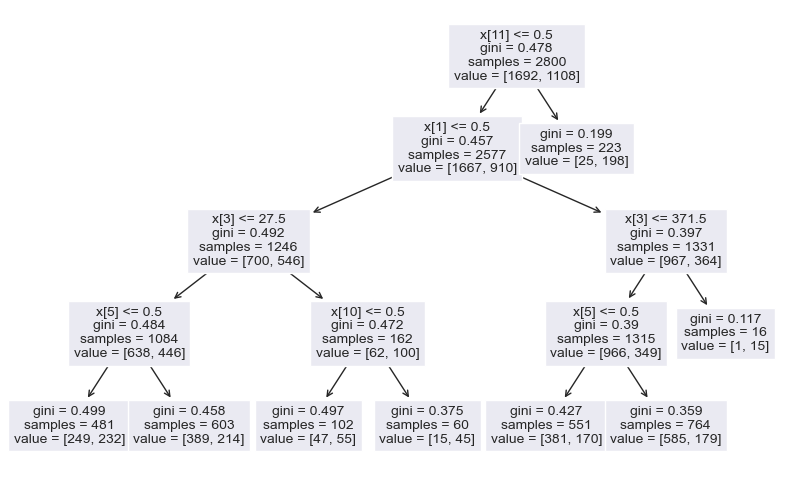

In [75]:
plt.figure(figsize=(10, 6))
tree.plot_tree(d_tree_tuned, fontsize=10)
plt.show()

In [65]:
importance = d_tree_tuned.feature_importances_
importance_df = pd.DataFrame(importance, index=X_train.columns, columns=["Importance"])
importance_df = importance_df[importance_df['Importance'] > 0]
importance_df.sort_values(by = 'Importance', ascending=False)

,Importance
Outcome_success,0.604741
HHInsurance,0.179916
DaysPassed,0.135101
Marital_Married,0.062948
Outcome_other,0.017294


# RANDOM FOREST -- UNTUNED

Training Accuracy: 0.7632142857142857
Testing Accuracy: 0.6525


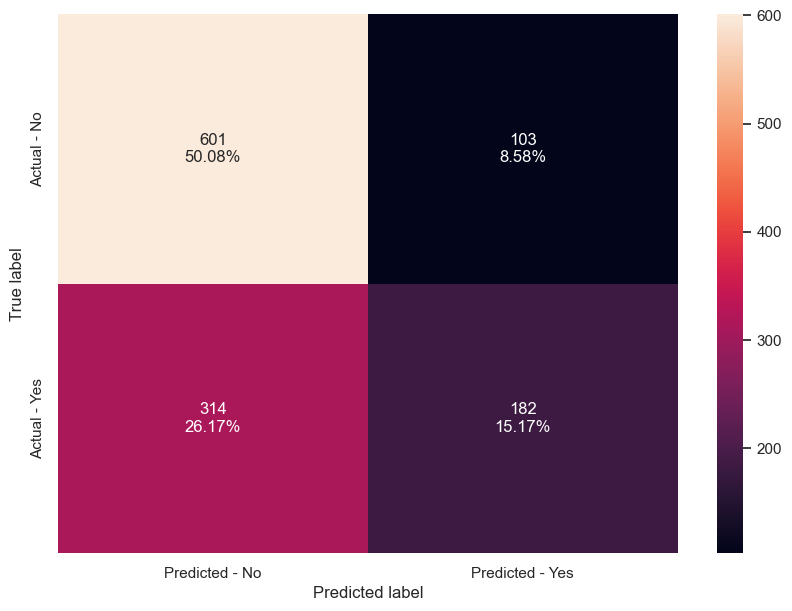

In [78]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

#Calculating model accuracy
print('Training Accuracy:', random_forest.score(X_train, y_train))
print('Testing Accuracy:', random_forest.score(X_test, y_test))

#Creating confusion matrix
make_confusion_matrix(random_forest, y_test)

# COMPARISON

In [79]:
# defining list of models
models = [random_forest, d_tree, d_tree_tuned, logreg]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
over_fit = []

# looping through all the models to get the metrics score - Accuracy
for model in models:

    j_train = model.score(X_train, y_train)
    j_test = model.score(X_test, y_test)
    acc_train.append(j_train)
    acc_test.append(j_test)
    over_fit.append(abs(j_train - j_test))

In [81]:
comparison_frame = pd.DataFrame({'Model':['Random Forest', 'Decision Tree','Tuned Decision Tree', 'Logistic Regression'],
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test, 'Overfit':over_fit})

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_Accuracy',ascending=False)

,Model,Train_Accuracy,Test_Accuracy,Overfit
3,Logistic Regression,0.692857,0.682500,0.010357
2,Tuned Decision Tree,0.684643,0.673333,0.011310
0,Random Forest,0.763214,0.652500,0.110714
1,Decision Tree,0.763214,0.650000,0.113214


## Analysis

#### Random forest and untuned decision tree were nearly identical -- the model with the most accuracy was the logistic regression originally created, but the decision tree (tuned) was close with the testing and training accuracy both being similar.